In [ ]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import MNIST

In [6]:
dataset = MNIST(root='data/', download=True)

Processing...
Done!


In [7]:
len(dataset)

60000

In [12]:
test_dataset = MNIST(root='data/', train=False)
print(len(test_dataset))

dataset[0]

10000


(<PIL.Image.Image image mode=L size=28x28 at 0x7F2F4ACF1390>, tensor(5))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Label:  5


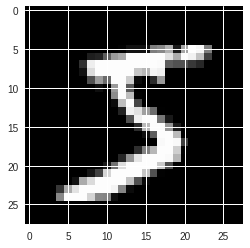

In [19]:
image, label = dataset[0]
plt.imshow(image)
print('Label: ', label.item())

Label:  3


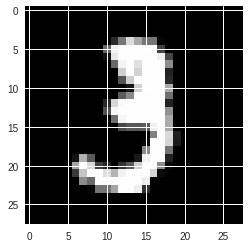

In [20]:
image, label = dataset[10]
plt.imshow(image)
print('Label: ', label.item())

In [0]:
import torchvision.transforms as transforms

In [0]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [24]:
img_tensor, label = dataset[0]
print(img_tensor.shape)
print(label)

torch.Size([1, 28, 28])
tensor(5)


In [26]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor))
print(torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.)
tensor(0.)


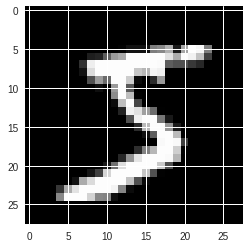

In [27]:
plt.imshow(img_tensor[0], cmap='gray')

In [0]:
def split_indices(n, val_pct):
  n_val = int(n * val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:], idxs[:n_val]

In [0]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [38]:
print(len(train_indices), len(val_indices))
print('sample val indices: ', val_indices[:20])

48000 12000
sample val indices:  [58481 31407 15258  7275  3458 54542 46647 20601  7789 57480 56233 53508
 28220 46633 48812 23081  9489 22004   135 50476]


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size=100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [0]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [45]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0282,  0.0054, -0.0157,  ...,  0.0096,  0.0096,  0.0038],
        [ 0.0184, -0.0152, -0.0234,  ..., -0.0167, -0.0041, -0.0265],
        [-0.0210, -0.0218,  0.0095,  ..., -0.0085,  0.0187, -0.0023],
        ...,
        [-0.0212, -0.0342,  0.0179,  ...,  0.0323, -0.0244, -0.0094],
        [ 0.0334,  0.0101,  0.0232,  ..., -0.0186, -0.0315, -0.0115],
        [-0.0134,  0.0032, -0.0036,  ..., -0.0197, -0.0317,  0.0154]],
       requires_grad=True)

In [46]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0268,  0.0067,  0.0174, -0.0287, -0.0327,  0.0088, -0.0195,  0.0311,
         0.0131, -0.0233], requires_grad=True)

In [115]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

torch.Size([100, 1, 28, 28])


In [0]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)
    
  def forward(self, xb):
    xb = xb.reshape(-1, 28*28)
    out = self.linear(xb)
    return out
  
model = MnistModel()

In [50]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-1.8038e-02,  7.1531e-03, -2.0882e-02,  ...,  1.3453e-02,
           2.6388e-02,  2.6762e-02],
         [ 2.4977e-02,  7.3913e-03, -2.4084e-02,  ...,  2.0258e-05,
           1.5780e-02,  1.4643e-02],
         [ 1.4867e-02,  7.0904e-03, -3.2066e-02,  ..., -1.6382e-02,
           1.2302e-02, -5.9775e-03],
         ...,
         [ 2.4134e-02,  8.5762e-03, -5.3016e-03,  ...,  2.5321e-02,
          -4.5259e-03, -2.1313e-02],
         [-2.4399e-03,  6.3815e-03,  2.7001e-02,  ...,  1.4436e-02,
           4.9738e-03,  2.1362e-02],
         [ 8.5632e-03,  2.0229e-02,  2.6317e-02,  ..., -1.4999e-02,
           8.3419e-04,  2.7326e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0114, -0.0298, -0.0246, -0.0288, -0.0154, -0.0014, -0.0223,  0.0307,
          0.0063, -0.0130], requires_grad=True)]

In [52]:
for images, labels in train_loader:
  outputs = model(images)
  break
  
print('outputs.shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

outputs.shape:  torch.Size([100, 10])
Sample outputs: 
 tensor([[ 1.6375e-01, -1.5585e-01,  4.9310e-02, -1.9962e-01,  2.5756e-01,
         -7.5188e-03,  4.5942e-01,  2.7973e-02,  1.0505e-01, -2.8695e-01],
        [ 2.2187e-02, -1.8248e-01,  2.8666e-02, -3.7090e-02,  8.9580e-02,
          2.7094e-01, -1.2627e-04,  1.7981e-01, -1.6667e-01,  3.2104e-02]])


In [0]:
import torch.nn.functional as F

In [56]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities: \n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.1105, 0.0803, 0.0985, 0.0768, 0.1213, 0.0931, 0.1485, 0.0964, 0.1042,
         0.0704],
        [0.0990, 0.0807, 0.0996, 0.0933, 0.1059, 0.1269, 0.0968, 0.1159, 0.0820,
         0.1000]])
Sum:  0.9999999403953552


In [57]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)

tensor([6, 5, 7, 6, 6, 4, 4, 5, 5, 0, 7, 5, 3, 6, 6, 4, 4, 6, 4, 4, 5, 6, 5, 6,
        4, 5, 4, 6, 1, 5, 4, 5, 6, 6, 5, 4, 5, 4, 3, 3, 3, 5, 4, 4, 4, 4, 3, 6,
        6, 4, 4, 4, 6, 5, 6, 5, 1, 5, 5, 4, 4, 4, 5, 3, 5, 5, 6, 4, 5, 6, 0, 5,
        3, 3, 3, 6, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 6, 3, 4, 5, 6, 1, 7, 2, 3, 5,
        6, 5, 5, 5])


In [59]:
labels

tensor([7, 3, 0, 1, 8, 0, 6, 4, 7, 4, 0, 2, 0, 1, 8, 0, 8, 6, 0, 2, 2, 3, 2, 0,
        8, 0, 8, 7, 5, 6, 8, 3, 1, 8, 3, 1, 5, 4, 4, 1, 4, 9, 1, 2, 1, 6, 2, 3,
        9, 3, 7, 1, 2, 8, 7, 8, 2, 8, 2, 4, 1, 6, 3, 1, 8, 9, 3, 9, 3, 7, 4, 9,
        1, 4, 1, 0, 1, 8, 6, 5, 3, 3, 2, 2, 3, 9, 8, 1, 4, 9, 8, 2, 0, 7, 1, 3,
        2, 4, 9, 3])

In [0]:
def accuracy(l1, l2):
  return torch.sum(l1 == l2).item()/len(l1)

In [61]:
accuracy(preds, labels)

0.05

In [0]:
loss_fn = F.cross_entropy

In [63]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3576, grad_fn=<NllLossBackward>)


In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt = None, metric = None):
  preds = model(xb)
  loss = loss_func(preds, yb)
  
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
    
  metric_result = None
  if metric is not None:
    metric_result = metric(preds, yb)
    
  return loss.item(), len(xb), metric_result

In [0]:
def evaluate(model, loss_fn, valid_dl, metric=None):
  with torch.no_grad():
    results = [loss_batch(model, loss_fn, xb, yb, metric = metric) for xb,yb in valid_dl]
    
  losses, nums, metrics = zip(*results)
  total = np.sum(nums)
  total_loss = np.sum(np.multiply(losses, nums))
  avg_loss = total_loss / total
  avg_metric = None
  if metric is not None:
    tot_metric = np.sum(np.multiply(metrics, nums))
    avg_metric = tot_metric / total
  return avg_loss, total, avg_metric

In [0]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.sum(preds == labels).item() / len(preds)

In [72]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3443, Accuracy: 0.0790


In [0]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
  for epoch in range(epochs):
    for xb, yb in train_dl:
      loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)
      
    result = evaluate(model, loss_fn, valid_dl, metric)
    val_loss, total, val_metric = result
    
    if metric is None:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))
    else:
      print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [0]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [82]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.9348, accuracy: 0.5989
Epoch [2/5], Loss: 1.6237, accuracy: 0.7224
Epoch [3/5], Loss: 1.4049, accuracy: 0.7653
Epoch [4/5], Loss: 1.2478, accuracy: 0.7851
Epoch [5/5], Loss: 1.1316, accuracy: 0.7994


In [83]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0429, accuracy: 0.8093
Epoch [2/5], Loss: 0.9731, accuracy: 0.8162
Epoch [3/5], Loss: 0.9170, accuracy: 0.8225
Epoch [4/5], Loss: 0.8708, accuracy: 0.8266
Epoch [5/5], Loss: 0.8321, accuracy: 0.8298


In [84]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7992, accuracy: 0.8327
Epoch [2/5], Loss: 0.7708, accuracy: 0.8352
Epoch [3/5], Loss: 0.7461, accuracy: 0.8373
Epoch [4/5], Loss: 0.7243, accuracy: 0.8393
Epoch [5/5], Loss: 0.7050, accuracy: 0.8413


In [85]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6877, accuracy: 0.8428
Epoch [2/5], Loss: 0.6721, accuracy: 0.8442
Epoch [3/5], Loss: 0.6580, accuracy: 0.8463
Epoch [4/5], Loss: 0.6452, accuracy: 0.8482
Epoch [5/5], Loss: 0.6334, accuracy: 0.8499


In [86]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6226, accuracy: 0.8517
Epoch [2/5], Loss: 0.6126, accuracy: 0.8532
Epoch [3/5], Loss: 0.6034, accuracy: 0.8546
Epoch [4/5], Loss: 0.5948, accuracy: 0.8560
Epoch [5/5], Loss: 0.5868, accuracy: 0.8573


In [87]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.5793, accuracy: 0.8582
Epoch [2/5], Loss: 0.5723, accuracy: 0.8592
Epoch [3/5], Loss: 0.5657, accuracy: 0.8598
Epoch [4/5], Loss: 0.5595, accuracy: 0.8608
Epoch [5/5], Loss: 0.5536, accuracy: 0.8619


In [88]:
fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/10], Loss: 0.5481, accuracy: 0.8628
Epoch [2/10], Loss: 0.5428, accuracy: 0.8634
Epoch [3/10], Loss: 0.5378, accuracy: 0.8636
Epoch [4/10], Loss: 0.5331, accuracy: 0.8642
Epoch [5/10], Loss: 0.5286, accuracy: 0.8653
Epoch [6/10], Loss: 0.5243, accuracy: 0.8662
Epoch [7/10], Loss: 0.5202, accuracy: 0.8666
Epoch [8/10], Loss: 0.5163, accuracy: 0.8672
Epoch [9/10], Loss: 0.5125, accuracy: 0.8682
Epoch [10/10], Loss: 0.5089, accuracy: 0.8689


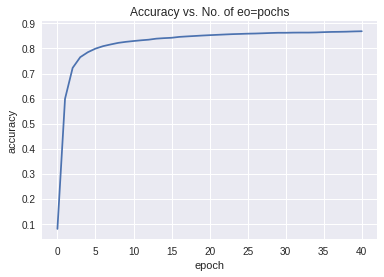

In [91]:
accuracies = [0.0790, 0.5989, 0.7224, 0.7653, 0.7851, 0.7994, 0.8093, 0.8162, 0.8225, 0.8266,
              0.8298, 0.8327, 0.8352, 0.8393, 0.8413, 0.8428, 0.8463, 0.8482, 0.8499, 0.8517,
              0.8532, 0.8546, 0.8560, 0.8573, 0.8582, 0.8592, 0.8598, 0.8608, 0.8619, 0.8628,
              0.8628, 0.8634, 0.8636, 0.8636, 0.8642, 0.8653, 0.8662, 0.8666, 0.8672, 0.8682, 0.8689]

plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of eo=pochs')
plt.show()

In [0]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


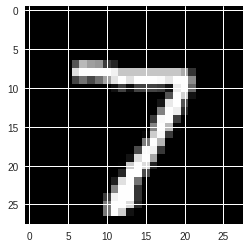

In [93]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label.item())

In [0]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label:  7 , Predicted:  7


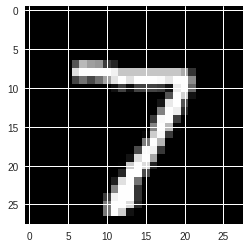

In [103]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label.item(), ', Predicted: ', predict_image(img, model))

Label:  0 , Predicted:  0


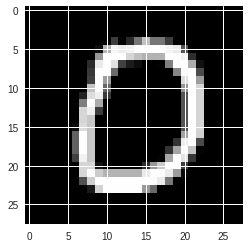

In [104]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label.item(), ', Predicted: ', predict_image(img, model))

Label:  9 , Predicted:  9


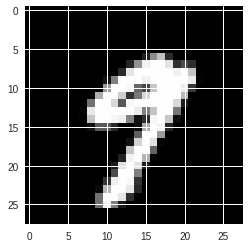

In [105]:
img, label = test_dataset[20]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label.item(), ', Predicted: ', predict_image(img, model))

Label:  3 , Predicted:  5


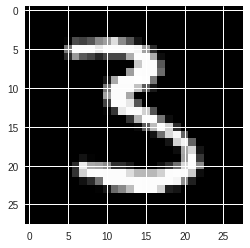

In [106]:
img, label = test_dataset[1889]
plt.imshow(img[0], cmap = 'gray')
print('Label: ', label.item(), ', Predicted: ', predict_image(img, model))

In [108]:
test_loader = DataLoader(test_dataset, batch_size = 200)

test_loss, totla, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.4739, Accuracy: 0.8834


In [0]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [110]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0117,  0.0323, -0.0114,  ...,  0.0148, -0.0114,  0.0136],
                      [ 0.0124,  0.0070, -0.0326,  ..., -0.0107, -0.0051,  0.0015],
                      [ 0.0198, -0.0254,  0.0022,  ...,  0.0139,  0.0311, -0.0185],
                      ...,
                      [ 0.0067,  0.0332, -0.0017,  ...,  0.0264, -0.0351, -0.0135],
                      [-0.0054,  0.0231,  0.0352,  ..., -0.0136, -0.0069, -0.0179],
                      [ 0.0312, -0.0146,  0.0164,  ..., -0.0238,  0.0135,  0.0238]])),
             ('linear.bias',
              tensor([-0.0802,  0.1626, -0.0464, -0.0479,  0.0092,  0.1282, -0.0107,  0.0947,
                      -0.1877, -0.0583]))])

In [112]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0117,  0.0323, -0.0114,  ...,  0.0148, -0.0114,  0.0136],
                      [ 0.0124,  0.0070, -0.0326,  ..., -0.0107, -0.0051,  0.0015],
                      [ 0.0198, -0.0254,  0.0022,  ...,  0.0139,  0.0311, -0.0185],
                      ...,
                      [ 0.0067,  0.0332, -0.0017,  ...,  0.0264, -0.0351, -0.0135],
                      [-0.0054,  0.0231,  0.0352,  ..., -0.0136, -0.0069, -0.0179],
                      [ 0.0312, -0.0146,  0.0164,  ..., -0.0238,  0.0135,  0.0238]])),
             ('linear.bias',
              tensor([-0.0802,  0.1626, -0.0464, -0.0479,  0.0092,  0.1282, -0.0107,  0.0947,
                      -0.1877, -0.0583]))])

In [114]:
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.4739, Accuracy: 0.8834
